In [1]:
! pip install pillow

In [8]:
import vist
import matplotlib.pyplot as plt
from datetime import datetime
from pprint import pprint
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 20)

### Load Story-in-Sequence Instance

In [3]:
vist_images_dir = '/Users/xiangtic/vist/images'
vist_annotations_dir = '/Users/xiangtic/vist/'
sis = vist.Story_in_Sequence(vist_images_dir, vist_annotations_dir)
sis.filter_img()

sis's [train] loaded. It took 1.35 seconds.
sis's [val] loaded. It took 0.15 seconds.
sis's [test] loaded. It took 0.23 seconds.
Make mapping ...
Mapping for [Albums][Images][Stories][Sents] done.


### Let's check one album.

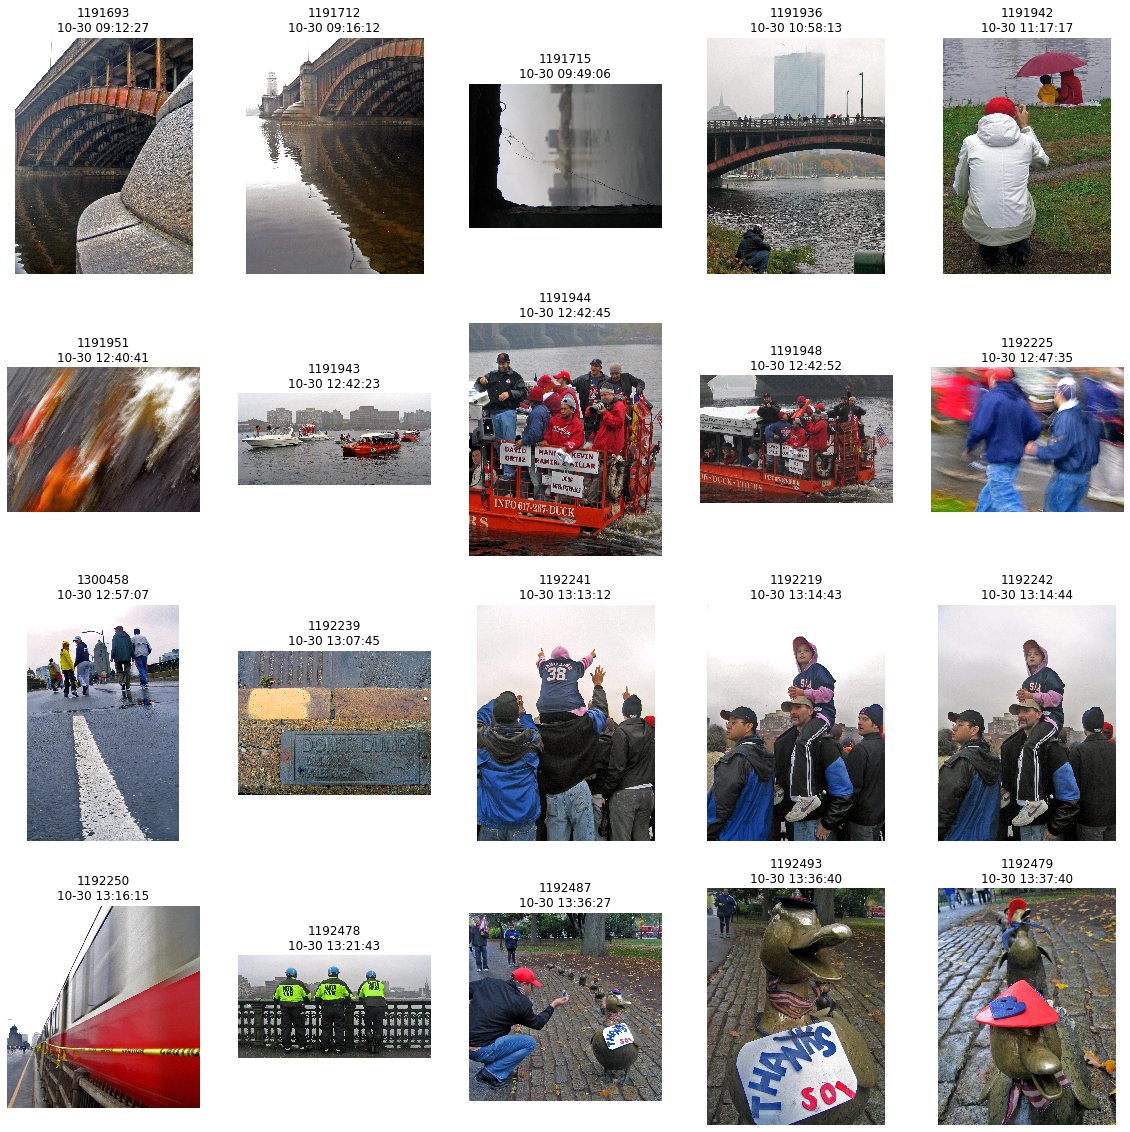

In [9]:
album_id = list(sis.Albums.keys())[0]
sis.show_album(album_id)
album = sis.Albums[album_id]
# pprint(album)

### Check its story

hahaha
hahaha
hahaha
hahaha
hahaha


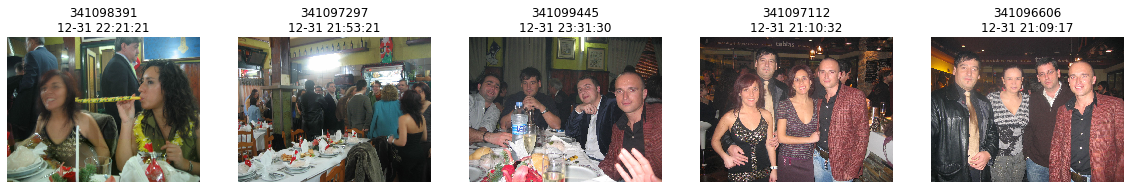

0: img_id[341098391], the family decided to spend a day together by the waters .
1: img_id[341097297], the weather was great and the sun was shining brightly .
2: img_id[341099445], they looked off into the sea and saw many boats .
3: img_id[341097112], they also decided to visit this building to check it out .
4: img_id[341096606], in the end , it was a great day .
['341098391', '341097297', '341099445', '341097112', '341096606']


In [27]:
story_ids = sis.Albums['72157594452136990']['story_ids']
story_id = story_ids[0]
sis.show_story(story_id)
print(sis.Stories[story_id]['img_ids'])

## Here are some stats about SIS dataset.

In [23]:
# albums stats
split_to_album_ids = {'train': [], 'val': [], 'test': []}
total_albums = 0
for split in ['train', 'val', 'test']:
    split_to_album_ids[split] = [album_id for album_id, album in sis.Albums.items() if album['split'] == split]
    print('There are [%s] albums in [%s] split.' % (len(split_to_album_ids[split]), split))
    total_albums += len(split_to_album_ids[split])
print('In total, there are [%s] albums.' % total_albums)

There are [546] albums in [train] split.
There are [0] albums in [val] split.
There are [0] albums in [test] split.
In total, there are [546] albums.


In [34]:
# stories stats
split_to_story_ids = {'train': [], 'val': [], 'test': []}
for story in sis.stories:
    album_id = story['album_id']
    if album_id in sis.Albums:
        split = sis.Albums[album_id]['split']
        split_to_story_ids[split] += [story['id']]
total_stories = 0
for split in ['train', 'val', 'test']:
    print('There are [%s] stories in [%s] split.' % (len(split_to_story_ids[split]), split))
    total_stories += len(split_to_story_ids[split])
print('In total, there are [%s] stories.' % (total_stories))

There are [2730] stories in [train] split.
There are [0] stories in [val] split.
There are [0] stories in [test] split.
In total, there are [2730] stories.


In [36]:
# sents stats
print('SIS:')
split_to_sent_ids = {'train': [], 'val': [], 'test': []}
for sent in sis.sents:
    album_id = sent['album_id']
    if album_id in sis.Albums:
        split = sis.Albums[album_id]['split']
        split_to_sent_ids[split] += [sent['id']]
total_sents = 0
for split in ['train', 'val', 'test']:
    print('There are [%s] sents in [%s] split.' % (len(split_to_sent_ids[split]), split))
    total_sents += len(split_to_sent_ids[split])
print('In total, there are [%s] sents.' % (total_sents))

SIS:
There are [13650] sents in [train] split.
There are [0] sents in [val] split.
There are [0] sents in [test] split.
In total, there are [13650] sents.
